In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv(r"C:\Users\yashu\Downloads\archive (20)\spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [17]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [19]:
col_name=['Unnamed: 3','Unnamed: 4']
df.drop(columns=col_name , inplace=True)

In [21]:
df.shape

(5572, 2)

In [26]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='v1', ylabel='Count'>

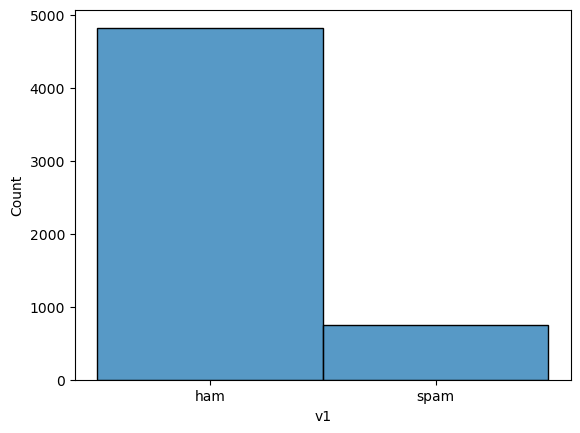

In [27]:
sns.histplot(df['v1'])

In [31]:
df.duplicated().sum()

403

In [33]:
df=df.drop_duplicates()


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [38]:
df['v1']=df['v1'].astype('category')


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   v1      5169 non-null   category
 1   v2      5169 non-null   object  
dtypes: category(1), object(1)
memory usage: 85.9+ KB


In [46]:
col={'v1':'Spam','v2':'Mail'}
df=df.rename(columns=col)
df

,Spam,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [47]:
df['Spam'].replace(['ham','spam'],['0','1'],inplace=True)

In [48]:
df

,Spam,Mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(df['Mail'],df['Spam'],test_size=0.2)

In [52]:
X_train

3983    Hey, I missed you tm of last night as my phone...
3220    Thanks for your ringtone order, reference numb...
4892                               Send me the new number
1798       That one week leave i put know that time. Why.
118     Hmm...my uncle just informed me that he's payi...
                              ...                        
2001               Idea will soon get converted to live:)
4228    Have you bookedthe hut? And also your time off...
5026    PRIVATE! Your 2003 Account Statement for shows...
1338    Aight sorry I take ten years to shower. What's...
4007    Forgot you were working today! Wanna chat, but...
Name: Mail, Length: 4135, dtype: object

In [53]:
X_test

4821    u r a winner U ave been specially selected 2 r...
489     I think i've fixed it can you send a test mess...
932                    So do you have samus shoulders yet
3865         Theoretically yeah, he could be able to come
4426            So what did the bank say about the money?
                              ...                        
1292    Da my birthdate in certificate is in april but...
4617    Nvm... I'm going to wear my sport shoes anyway...
4052                     I was slept that time.you there?
568     Love it! Daddy will make you scream with pleas...
2207    Usually the body takes care of it buy making s...
Name: Mail, Length: 1034, dtype: object

In [54]:
Y_train

3983    0
3220    1
4892    0
1798    0
118     0
       ..
2001    0
4228    0
5026    1
1338    0
4007    0
Name: Spam, Length: 4135, dtype: category
Categories (2, object): ['0', '1']

In [55]:
Y_test

4821    1
489     0
932     0
3865    0
4426    0
       ..
1292    0
4617    0
4052    0
568     0
2207    0
Name: Spam, Length: 1034, dtype: category
Categories (2, object): ['0', '1']

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [61]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [63]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]
clf.predict(emails)

array(['0', '1'], dtype='<U1')

In [65]:
clf.score(X_test,Y_test)

0.9874274661508704